In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv("BP_data.csv")  # RED + IR feature DataFrame
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [22]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [23]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [24]:
# 결측치 처리
fill_na = {
    'Genetic_Pedigree_Coefficient': df['Genetic_Pedigree_Coefficient'].mean(),
    'Pregnancy' : 0,
    'alcohol_consumption_per_day' : df['alcohol_consumption_per_day'].mean()
}
df = df.fillna(value = fill_na)

In [25]:
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [26]:
x = df.drop(columns=["Patient_Number", "Blood_Pressure_Abnormality"])
X = x.values  # 입력 피처, 불필요 데이터 제거
y = df["Blood_Pressure_Abnormality"].values  # 타겟 레이블

In [27]:
x

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10.14,0.02,69,26,1,0.0,1,26118,47568,144.000000,3,1,0
1996,11.77,1.00,24,45,1,1.0,1,2572,8063,251.008532,3,1,1
1997,16.91,0.22,18,42,0,0.0,0,14933,24753,251.008532,2,1,1
1998,11.15,0.72,46,45,1,0.0,1,18157,15275,253.000000,3,0,1


In [28]:
# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 텐서 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 데이터로더
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# ResNet 블록
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        residual = x
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x += residual
        return self.relu(x)

# 전체 모델
class ResNetTransformer(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc0 = nn.Linear(input_dim, hidden_dim)
        self.resnet = ResNetBlock(1, 1)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=4)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.fc_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc0(x)
        x = x.unsqueeze(1)
        x = self.resnet(x)
        x = x.squeeze(1).unsqueeze(0)
        x = self.transformer(x)
        x = x.squeeze(0)
        x = self.fc_out(x)
        return x

# 모델, 손실, 최적화
model = ResNetTransformer(input_dim=X.shape[1], hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 함수
def train(model, loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for xb, yb in loader:
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(loader):.4f}")

# 학습 실행
train(model, train_loader, criterion, optimizer)

/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/20, Loss: 0.3142
Epoch 2/20, Loss: 0.1584
Epoch 3/20, Loss: 0.1339
Epoch 4/20, Loss: 0.1098
Epoch 5/20, Loss: 0.1027
Epoch 6/20, Loss: 0.0941
Epoch 7/20, Loss: 0.0925
Epoch 8/20, Loss: 0.0851
Epoch 9/20, Loss: 0.0846
Epoch 10/20, Loss: 0.0789
Epoch 11/20, Loss: 0.0819
Epoch 12/20, Loss: 0.0784
Epoch 13/20, Loss: 0.0718
Epoch 14/20, Loss: 0.0744
Epoch 15/20, Loss: 0.0725
Epoch 16/20, Loss: 0.0712
Epoch 17/20, Loss: 0.0694
Epoch 18/20, Loss: 0.0652
Epoch 19/20, Loss: 0.0635
Epoch 20/20, Loss: 0.0622


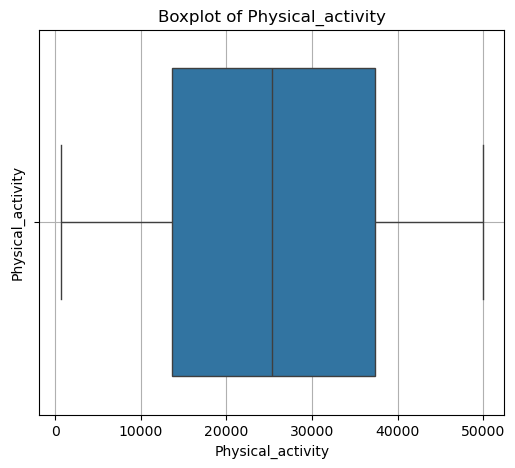

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

column_name = 'Physical_activity'

# Boxplot 그리기
plt.figure(figsize=(6, 5))
sns.boxplot(x=df[column_name])
plt.title(f"Boxplot of {column_name}")
plt.ylabel(column_name)
plt.grid(True)
plt.show()

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserW

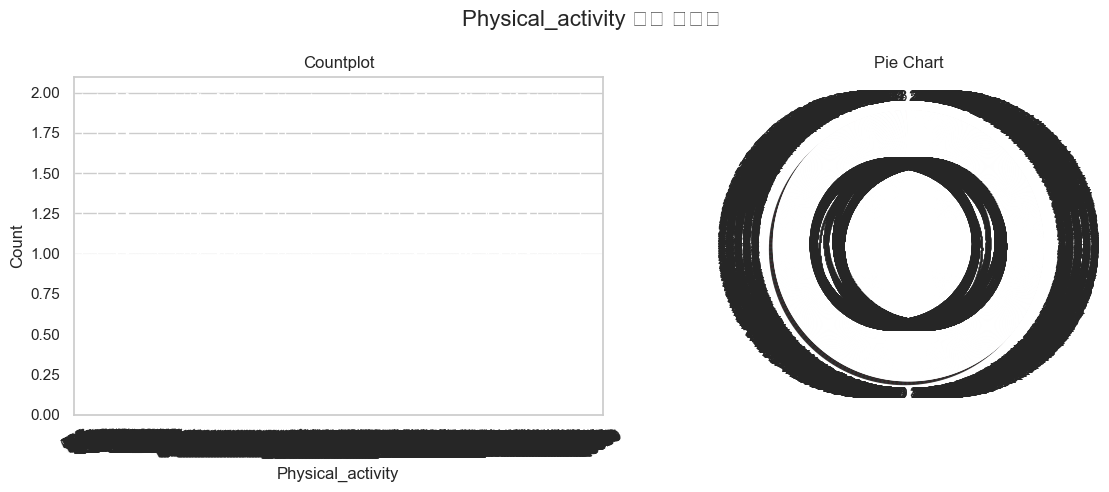

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserW

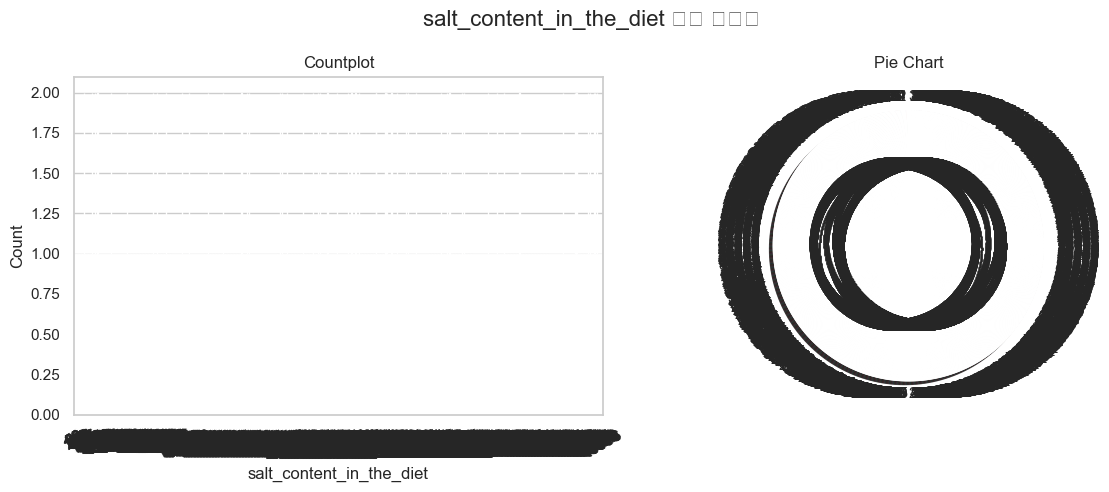

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserW

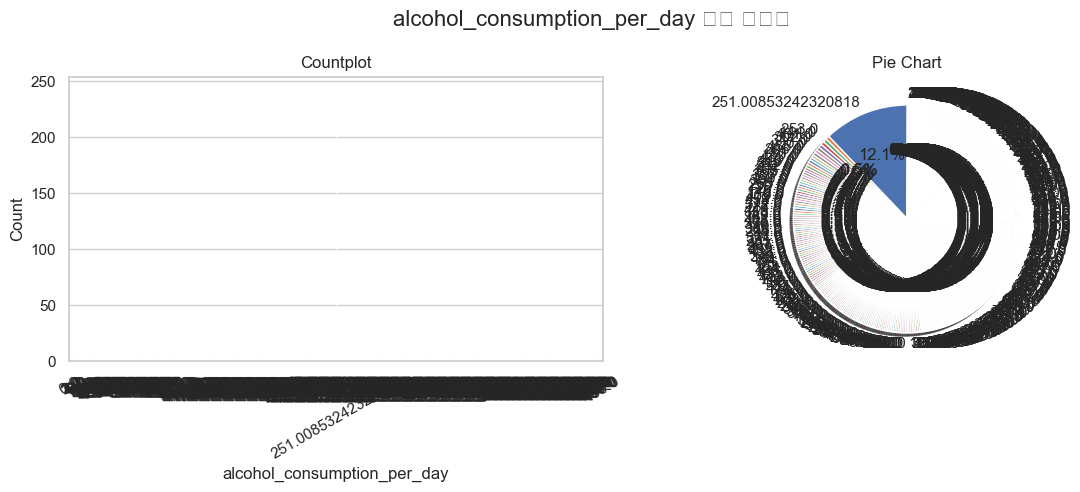

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/514890736.py:33: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserW

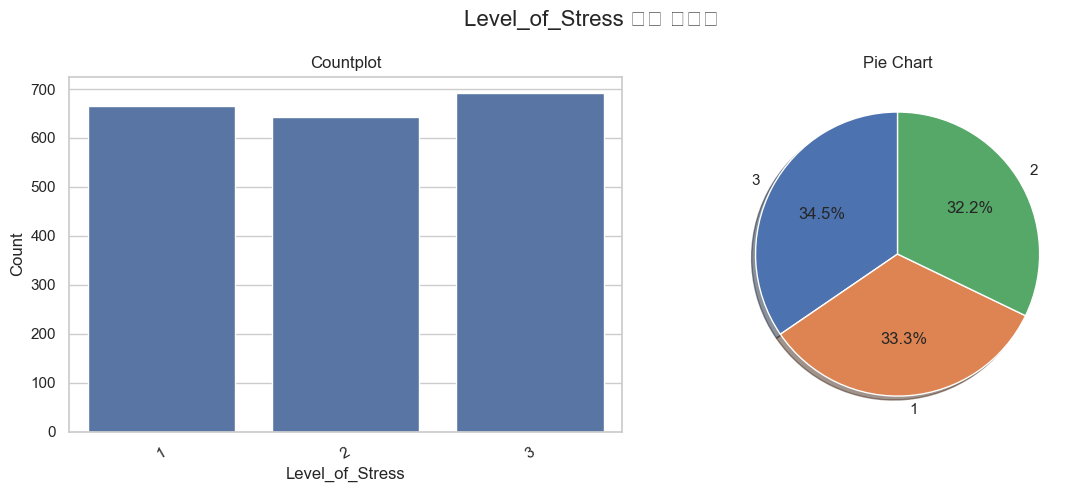

In [31]:
# 시각화할 컬럼 리스트 지정
columns_to_plot = ['Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress']

# 그래프 스타일 설정
sns.set(style="whitegrid")

def plot_category_columns(df, columns):
    for col in columns:
        if col not in df.columns:
            print(f"[경고] 컬럼 '{col}'이 데이터프레임에 없음. 건너뜀.")
            continue

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f"{col} 분포 시각화", fontsize=16)

        # Countplot
        sns.countplot(x=col, data=df, ax=axes[0])
        axes[0].set_title("Countplot")
        axes[0].set_ylabel("Count")
        axes[0].set_xlabel(col)
        axes[0].tick_params(axis='x', rotation=30)

        # Pie chart
        df[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            ax=axes[1],
            startangle=90,
            shadow=True
        )
        axes[1].set_title("Pie Chart")
        axes[1].set_ylabel("")

        plt.tight_layout()
        plt.show()

# 함수 호출
plot_category_columns(df, columns_to_plot)

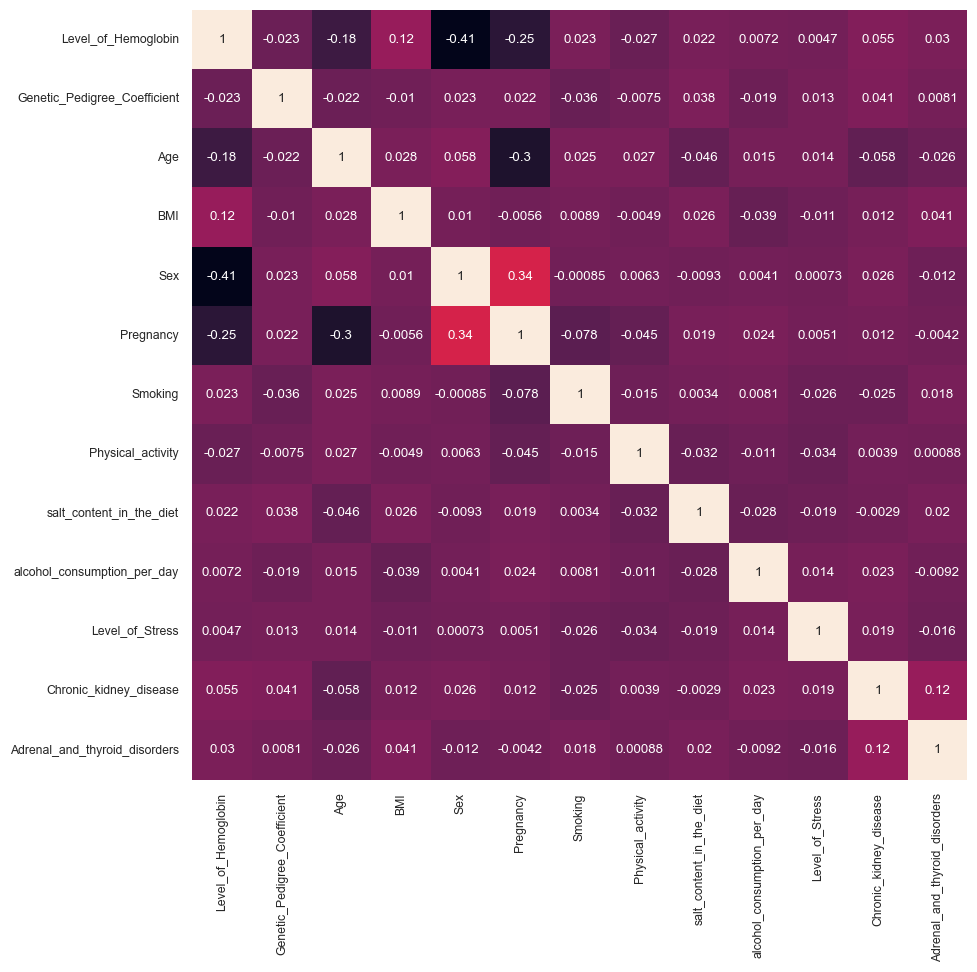

In [35]:
x_corr=x.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(x_corr, annot=True, cbar=False)
plt.show()

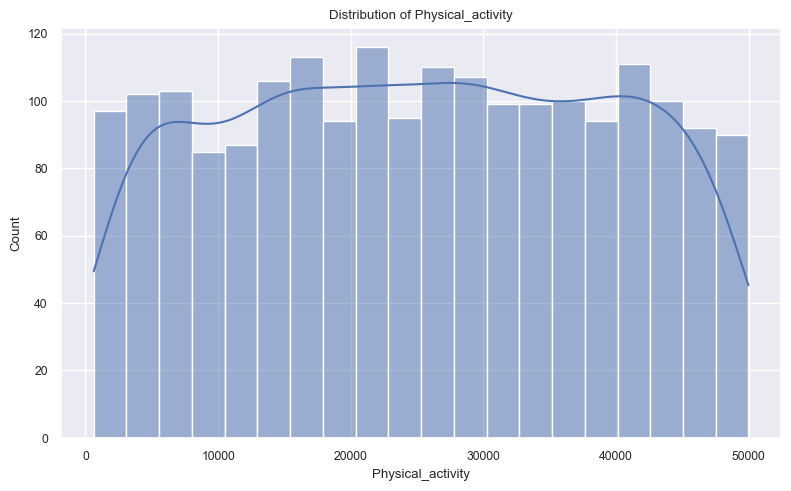

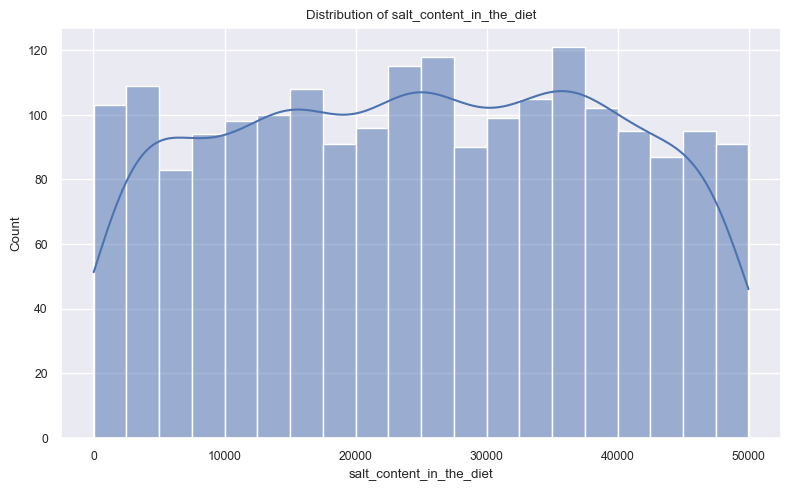

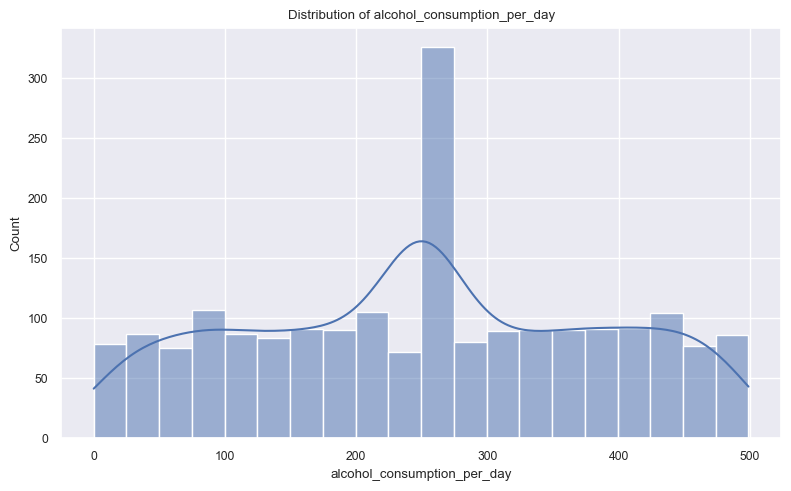

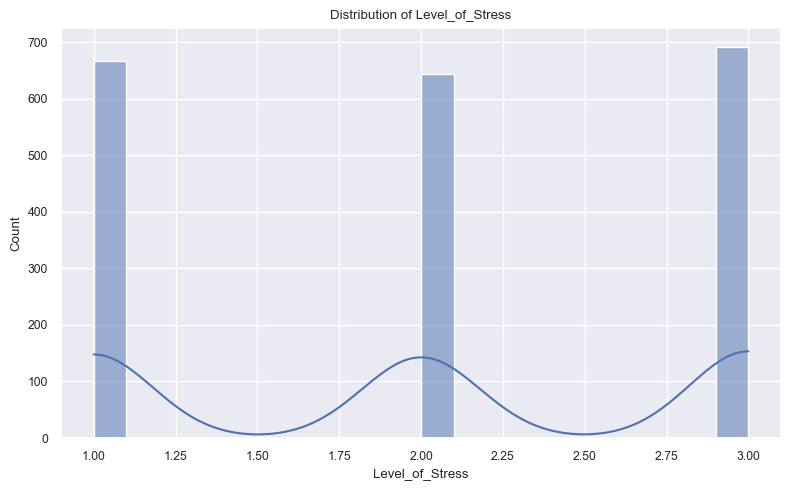

In [36]:
numeric_cols = ['Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3343693334.py:13: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3343693334.py:13: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3343693334.py:13: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3343693334.py:13: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3343693334.py:13: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3343693334.py:13:

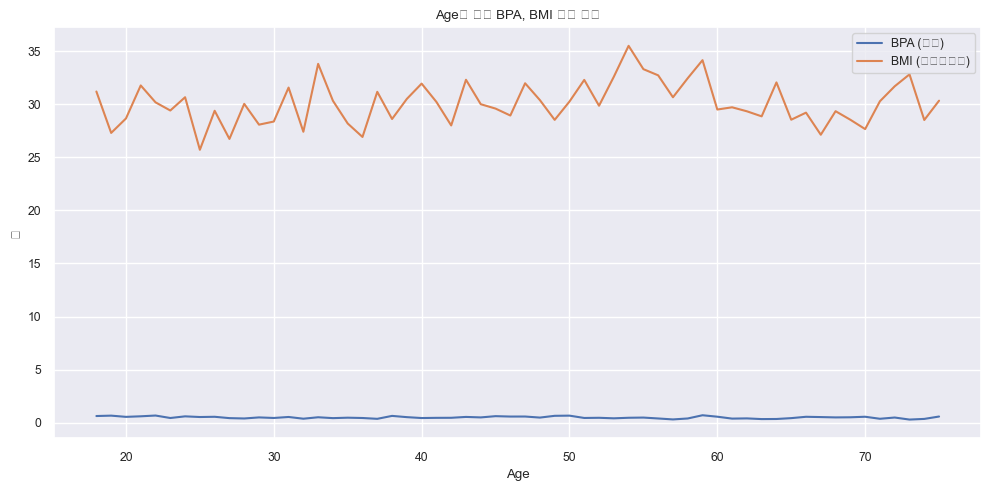

In [42]:
# 나이를 기준으로 평균 bpa, bmi 구하기
age_grouped = df.groupby('Age')[['Blood_Pressure_Abnormality', 'BMI']].mean().reset_index()

# Lineplot 그리기
plt.figure(figsize=(10, 5))
sns.lineplot(data=age_grouped, x='Age', y='Blood_Pressure_Abnormality', label='BPA (혈압)')
sns.lineplot(data=age_grouped, x='Age', y='BMI', label='BMI (체질량지수)')
plt.title("Age에 따른 BPA, BMI 평균 변화")
plt.xlabel("Age")
plt.ylabel("값")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/651167456.py:11: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/651167456.py:11: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/651167456.py:11: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/651167456.py:11: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/651167456.py:11: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/651167456.py:11: UserWarn

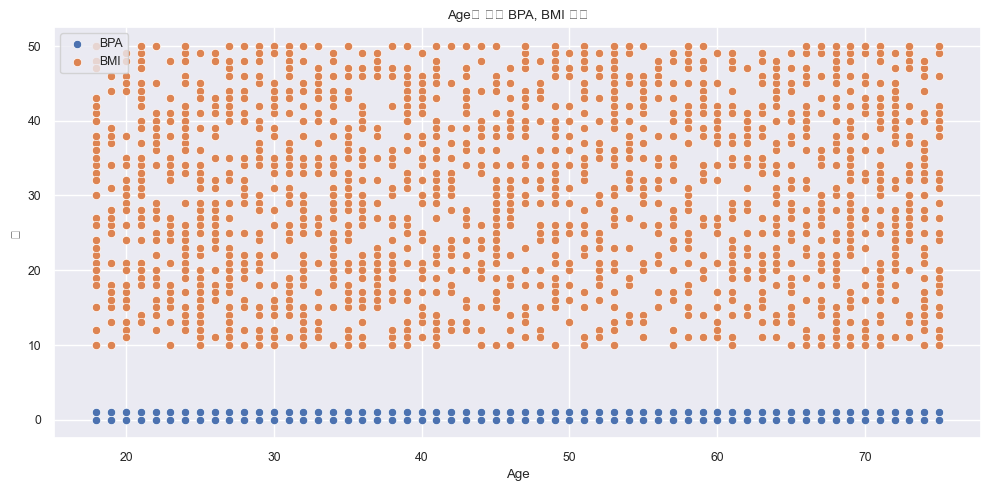

In [41]:
# 연령에 따른 혈압 비정상 여부와 BMI 수치

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Blood_Pressure_Abnormality', label='BPA')
sns.scatterplot(data=df, x='Age', y='BMI', label='BMI')
plt.title("Age에 따른 BPA, BMI 분포")
plt.xlabel("Age")
plt.ylabel("값")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:12: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:12: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:12: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:12: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:12: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:12:

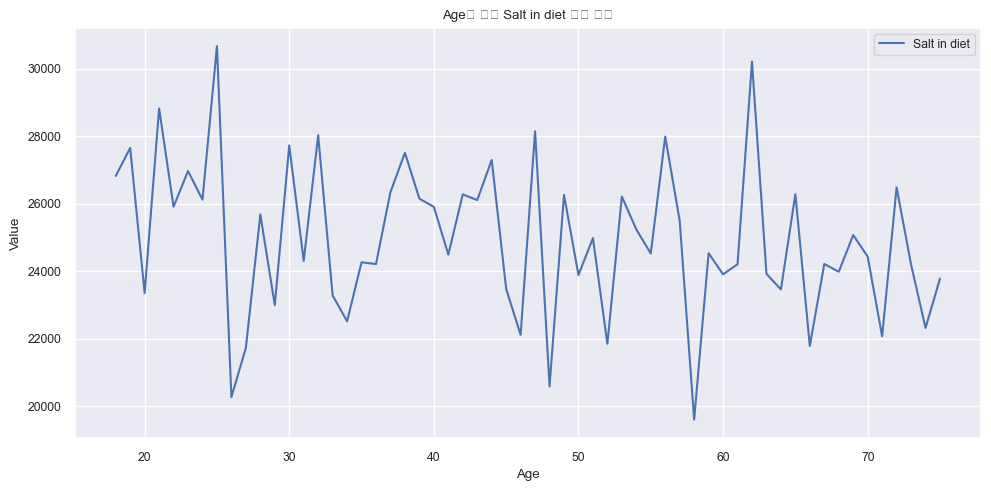

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:23: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:23: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:23: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:23: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:23: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_15392/3271953831.py:23:

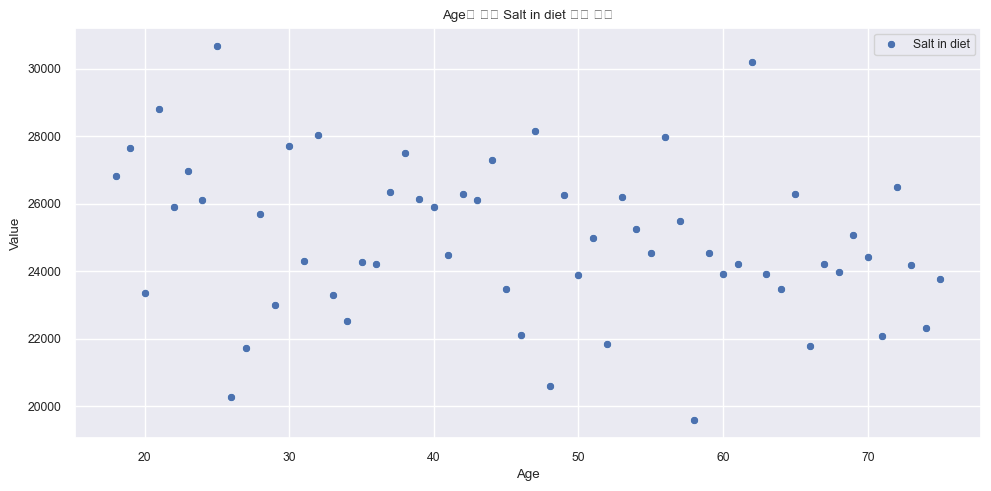

In [46]:
# 나이를 기준으로 평균 Salt in diet 구하기
age_grouped = df.groupby('Age')[['salt_content_in_the_diet']].mean().reset_index()

# Lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(data=age_grouped, x='Age', y='salt_content_in_the_diet', label='Salt in diet')
plt.title("Age에 따른 Salt in diet 평균 변화")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter
plt.figure(figsize=(10, 5))
sns.scatterplot(data=age_grouped, x='Age', y='salt_content_in_the_diet', label='Salt in diet')
plt.title("Age에 따른 Salt in diet 평균 변화")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()